In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
## Install xlrd package to load Excel files
#!conda install openpyxl
#!conda install xlrd

In [2]:
file1 = pd.read_csv('file1.csv')
file2 = pd.read_csv('file2.csv')
file3 = pd.read_csv('file3.csv')

In [3]:
file1


,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
file2

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Total Claim Amount,Policy Type,Vehicle Class
0,GS98873,Arizona,F,Bachelor,323912.47%,16061,88,1/0/00,633.600000,Personal Auto,Four-Door Car
1,CW49887,California,F,Master,462680.11%,79487,114,1/0/00,547.200000,Special Auto,SUV
2,MY31220,California,F,College,899704.02%,54230,112,1/0/00,537.600000,Personal Auto,Two-Door Car
3,UH35128,Oregon,F,College,2580706.30%,71210,214,1/1/00,1027.200000,Personal Auto,Luxury Car
4,WH52799,Arizona,F,College,380812.21%,94903,94,1/0/00,451.200000,Corporate Auto,Two-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
991,HV85198,Arizona,M,Master,847141.75%,63513,70,1/0/00,185.667213,Personal Auto,Four-Door Car
992,BS91566,Arizona,F,College,543121.91%,58161,68,1/0/00,140.747286,Corporate Auto,Four-Door Car
993,IL40123,Nevada,F,College,568964.41%,83640,70,1/0/00,471.050488,Corporate Auto,Two-Door Car
994,MY32149,California,F,Master,368672.38%,0,96,1/0/00,28.460568,Personal Auto,Two-Door Car


In [5]:
file3


,Customer,State,Customer Lifetime Value,Education,Gender,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
7067,TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car
7068,UP19263,California,7524.442436,College,M,21941,96,0,Personal Auto,691.200000,Four-Door Car


In [6]:
file1 = file1.rename(columns={'ST': 'State','GENDER':'Gender'})

In [7]:
file2 = file2.rename(columns={'ST': 'State','GENDER':'Gender'})

Customer	ST	GENDER	Education	Customer Lifetime Value	Income	Monthly Premium Auto	Number of Open Complaints	Policy Type	Vehicle Class	Total Claim Amount

In [8]:
file1.loc[:, ["Customer","State","Gender","Education","Customer Lifetime Value","Income","Monthly Premium Auto","Number of Open Complaints","Policy Type","Vehicle Class","Total Claim Amount"]]

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
file2.loc[:, ["Customer","State","Gender","Education","Customer Lifetime Value","Income","Monthly Premium Auto","Number of Open Complaints","Policy Type","Vehicle Class","Total Claim Amount"]]

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,GS98873,Arizona,F,Bachelor,323912.47%,16061,88,1/0/00,Personal Auto,Four-Door Car,633.600000
1,CW49887,California,F,Master,462680.11%,79487,114,1/0/00,Special Auto,SUV,547.200000
2,MY31220,California,F,College,899704.02%,54230,112,1/0/00,Personal Auto,Two-Door Car,537.600000
3,UH35128,Oregon,F,College,2580706.30%,71210,214,1/1/00,Personal Auto,Luxury Car,1027.200000
4,WH52799,Arizona,F,College,380812.21%,94903,94,1/0/00,Corporate Auto,Two-Door Car,451.200000
...,...,...,...,...,...,...,...,...,...,...,...
991,HV85198,Arizona,M,Master,847141.75%,63513,70,1/0/00,Personal Auto,Four-Door Car,185.667213
992,BS91566,Arizona,F,College,543121.91%,58161,68,1/0/00,Corporate Auto,Four-Door Car,140.747286
993,IL40123,Nevada,F,College,568964.41%,83640,70,1/0/00,Corporate Auto,Two-Door Car,471.050488
994,MY32149,California,F,Master,368672.38%,0,96,1/0/00,Personal Auto,Two-Door Car,28.460568


In [10]:
file3.loc[:, ["Customer","State","Gender","Education","Customer Lifetime Value","Income","Monthly Premium Auto","Number of Open Complaints","Policy Type","Vehicle Class","Total Claim Amount"]]

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,SA25987,Washington,M,High School or Below,3479.137523,0,104,0,Personal Auto,Two-Door Car,499.200000
1,TB86706,Arizona,M,Master,2502.637401,0,66,0,Personal Auto,Two-Door Car,3.468912
2,ZL73902,Nevada,F,Bachelor,3265.156348,25820,82,0,Personal Auto,Four-Door Car,393.600000
3,KX23516,California,F,High School or Below,4455.843406,0,121,0,Personal Auto,SUV,699.615192
4,FN77294,California,M,High School or Below,7704.958480,30366,101,2,Personal Auto,SUV,484.800000
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.987980,71941,73,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604,79,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0,85,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941,96,0,Personal Auto,Four-Door Car,691.200000


In [11]:
cars=pd.concat([file1,file2,file3], axis=0)

In [12]:
cars

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [13]:
cars = cars.drop_duplicates()
cars

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [14]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9135 entries, 0 to 7069
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer                   9134 non-null   object 
 1   State                      9134 non-null   object 
 2   Gender                     9012 non-null   object 
 3   Education                  9134 non-null   object 
 4   Customer Lifetime Value    9127 non-null   object 
 5   Income                     9134 non-null   float64
 6   Monthly Premium Auto       9134 non-null   float64
 7   Number of Open Complaints  9134 non-null   object 
 8   Policy Type                9134 non-null   object 
 9   Vehicle Class              9134 non-null   object 
 10  Total Claim Amount         9134 non-null   float64
dtypes: float64(3), object(8)
memory usage: 856.4+ KB


In [15]:
cars['Income'].isna().value_counts()

False    9134
True        1
Name: Income, dtype: int64

In [16]:
filtered_cars = cars[cars['Customer Lifetime Value'].notnull()]

In [17]:
filtered_cars['Customer Lifetime Value'] = filtered_cars['Customer Lifetime Value'].apply( lambda x : float(x.replace(r'%', ''))/100 if isinstance(x,str)  else  x)  
filtered_cars

C:\Users\User\AppData\Local\Temp\ipykernel_39236\1273915792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cars['Customer Lifetime Value'] = filtered_cars['Customer Lifetime Value'].apply( lambda x : float(x.replace(r'%', ''))/100 if isinstance(x,str)  else  x)


,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
1,QZ44356,Arizona,F,Bachelor,6979.535900,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.431700,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.861800,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.076500,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,F,Bachelor,8256.297800,62902.0,69.0,1/0/00,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.987980,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [18]:
filtered_cars['Customer Lifetime Value'] = filtered_cars['Customer Lifetime Value'].round()

C:\Users\User\AppData\Local\Temp\ipykernel_39236\265518927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cars['Customer Lifetime Value'] = filtered_cars['Customer Lifetime Value'].round()


In [19]:
filtered_cars

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
1,QZ44356,Arizona,F,Bachelor,6980.0,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.0,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7646.0,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.0,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,F,Bachelor,8256.0,62902.0,69.0,1/0/00,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23406.0,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3097.0,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8164.0,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.0,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [20]:
filtered_cars["Number of Open Complaints"].value_counts()

0         5629
1/0/00    1618
1          765
2          283
1/1/00     245
3          230
4          119
1/2/00      93
1/3/00      60
5           44
1/4/00      29
1/5/00      12
Name: Number of Open Complaints, dtype: int64

In [21]:
filtered_complain=filtered_cars[filtered_cars["Number of Open Complaints"].str.contains('/',na=False)]

In [22]:
filtered_complain

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
1,QZ44356,Arizona,F,Bachelor,6980.0,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.0,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7646.0,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.0,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,F,Bachelor,8256.0,62902.0,69.0,1/0/00,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
991,HV85198,Arizona,M,Master,8471.0,63513.0,70.0,1/0/00,Personal Auto,Four-Door Car,185.667213
992,BS91566,Arizona,F,College,5431.0,58161.0,68.0,1/0/00,Corporate Auto,Four-Door Car,140.747286
993,IL40123,Nevada,F,College,5690.0,83640.0,70.0,1/0/00,Corporate Auto,Two-Door Car,471.050488
994,MY32149,California,F,Master,3687.0,0.0,96.0,1/0/00,Personal Auto,Two-Door Car,28.460568


In [23]:
filtered_complain[["1","2","3"]]=filtered_complain["Number of Open Complaints"].str.split('/', expand=True)

C:\Users\User\AppData\Local\Temp\ipykernel_39236\3562230546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_complain[["1","2","3"]]=filtered_complain["Number of Open Complaints"].str.split('/', expand=True)
C:\Users\User\AppData\Local\Temp\ipykernel_39236\3562230546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_complain[["1","2","3"]]=filtered_complain["Number of Open Complaints"].str.split('/', expand=True)
C:\Users\User\AppData\Local\Temp\ipykernel_39236\3562230546.py:1: Settin

In [24]:
filtered_complain

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount,1,2,3
1,QZ44356,Arizona,F,Bachelor,6980.0,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935,1,0,00
2,AI49188,Nevada,F,Bachelor,12887.0,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247,1,0,00
3,WW63253,California,M,Bachelor,7646.0,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344,1,0,00
4,GA49547,Washington,M,High School or Below,5363.0,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323,1,0,00
5,OC83172,Oregon,F,Bachelor,8256.0,62902.0,69.0,1/0/00,Personal Auto,Two-Door Car,159.383042,1,0,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,HV85198,Arizona,M,Master,8471.0,63513.0,70.0,1/0/00,Personal Auto,Four-Door Car,185.667213,1,0,00
992,BS91566,Arizona,F,College,5431.0,58161.0,68.0,1/0/00,Corporate Auto,Four-Door Car,140.747286,1,0,00
993,IL40123,Nevada,F,College,5690.0,83640.0,70.0,1/0/00,Corporate Auto,Two-Door Car,471.050488,1,0,00
994,MY32149,California,F,Master,3687.0,0.0,96.0,1/0/00,Personal Auto,Two-Door Car,28.460568,1,0,00


In [25]:
filtered_complain=filtered_complain.drop(['Number of Open Complaints', '1','3'], axis=1)
filtered_complain

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Policy Type,Vehicle Class,Total Claim Amount,2
1,QZ44356,Arizona,F,Bachelor,6980.0,0.0,94.0,Personal Auto,Four-Door Car,1131.464935,0
2,AI49188,Nevada,F,Bachelor,12887.0,48767.0,108.0,Personal Auto,Two-Door Car,566.472247,0
3,WW63253,California,M,Bachelor,7646.0,0.0,106.0,Corporate Auto,SUV,529.881344,0
4,GA49547,Washington,M,High School or Below,5363.0,36357.0,68.0,Personal Auto,Four-Door Car,17.269323,0
5,OC83172,Oregon,F,Bachelor,8256.0,62902.0,69.0,Personal Auto,Two-Door Car,159.383042,0
...,...,...,...,...,...,...,...,...,...,...,...
991,HV85198,Arizona,M,Master,8471.0,63513.0,70.0,Personal Auto,Four-Door Car,185.667213,0
992,BS91566,Arizona,F,College,5431.0,58161.0,68.0,Corporate Auto,Four-Door Car,140.747286,0
993,IL40123,Nevada,F,College,5690.0,83640.0,70.0,Corporate Auto,Two-Door Car,471.050488,0
994,MY32149,California,F,Master,3687.0,0.0,96.0,Personal Auto,Two-Door Car,28.460568,0


In [26]:
filtered_complain = filtered_complain.rename(columns={'2': 'Number of Open Complaints'})

In [27]:
filtered_complain

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Policy Type,Vehicle Class,Total Claim Amount,Number of Open Complaints
1,QZ44356,Arizona,F,Bachelor,6980.0,0.0,94.0,Personal Auto,Four-Door Car,1131.464935,0
2,AI49188,Nevada,F,Bachelor,12887.0,48767.0,108.0,Personal Auto,Two-Door Car,566.472247,0
3,WW63253,California,M,Bachelor,7646.0,0.0,106.0,Corporate Auto,SUV,529.881344,0
4,GA49547,Washington,M,High School or Below,5363.0,36357.0,68.0,Personal Auto,Four-Door Car,17.269323,0
5,OC83172,Oregon,F,Bachelor,8256.0,62902.0,69.0,Personal Auto,Two-Door Car,159.383042,0
...,...,...,...,...,...,...,...,...,...,...,...
991,HV85198,Arizona,M,Master,8471.0,63513.0,70.0,Personal Auto,Four-Door Car,185.667213,0
992,BS91566,Arizona,F,College,5431.0,58161.0,68.0,Corporate Auto,Four-Door Car,140.747286,0
993,IL40123,Nevada,F,College,5690.0,83640.0,70.0,Corporate Auto,Two-Door Car,471.050488,0
994,MY32149,California,F,Master,3687.0,0.0,96.0,Personal Auto,Two-Door Car,28.460568,0


In [28]:
filtered_complain=filtered_complain.loc[:, ["Customer","State","Gender","Education","Customer Lifetime Value","Income","Monthly Premium Auto","Number of Open Complaints","Policy Type","Vehicle Class","Total Claim Amount"]]

In [29]:
filtered_complain

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
1,QZ44356,Arizona,F,Bachelor,6980.0,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.0,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7646.0,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.0,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,F,Bachelor,8256.0,62902.0,69.0,0,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
991,HV85198,Arizona,M,Master,8471.0,63513.0,70.0,0,Personal Auto,Four-Door Car,185.667213
992,BS91566,Arizona,F,College,5431.0,58161.0,68.0,0,Corporate Auto,Four-Door Car,140.747286
993,IL40123,Nevada,F,College,5690.0,83640.0,70.0,0,Corporate Auto,Two-Door Car,471.050488
994,MY32149,California,F,Master,3687.0,0.0,96.0,0,Personal Auto,Two-Door Car,28.460568


In [30]:
filtered_complain1=filtered_cars[filtered_cars["Number of Open Complaints"].str.contains('/',na=False)==False]

In [31]:
filtered_complain1

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,SA25987,Washington,M,High School or Below,3479.0,0.0,104.0,0,Personal Auto,Two-Door Car,499.200000
1,TB86706,Arizona,M,Master,2503.0,0.0,66.0,0,Personal Auto,Two-Door Car,3.468912
2,ZL73902,Nevada,F,Bachelor,3265.0,25820.0,82.0,0,Personal Auto,Four-Door Car,393.600000
3,KX23516,California,F,High School or Below,4456.0,0.0,121.0,0,Personal Auto,SUV,699.615192
4,FN77294,California,M,High School or Below,7705.0,30366.0,101.0,2,Personal Auto,SUV,484.800000
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23406.0,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3097.0,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8164.0,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.0,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [32]:
cars1=pd.concat([filtered_complain,filtered_complain1], axis=0)

In [33]:
cars1

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
1,QZ44356,Arizona,F,Bachelor,6980.0,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.0,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7646.0,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.0,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,F,Bachelor,8256.0,62902.0,69.0,0,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23406.0,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3097.0,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8164.0,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.0,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [34]:
cars1["State"].value_counts()

California    3030
Oregon        2601
Arizona       1629
Nevada         882
Washington     761
Cali           120
AZ              74
WA              30
Name: State, dtype: int64

In [35]:
cars1['State'] = cars1['State'].replace({'Cali': 'California','AZ' :'Arizona','WA':'Washington'})

In [36]:
cars1["State"].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     791
Name: State, dtype: int64

In [37]:
cars1["Gender"].value_counts()

F         4555
M         4365
Male        40
female      30
Femal       17
Name: Gender, dtype: int64

In [38]:
cars1['Gender'] = cars1['Gender'].replace({'F': 'Female','M' :'Male','female':'Female',"Femal":"Female"})

In [39]:
cars1["Gender"].value_counts()

Female    4602
Male      4405
Name: Gender, dtype: int64

In [40]:
cars1['Education'].value_counts()

Bachelor                2718
College                 2681
High School or Below    2613
Master                   748
Doctor                   344
Bachelors                 23
Name: Education, dtype: int64

In [41]:
cars1['Education'] = cars1['Education'].replace({'Bachelors': 'Bachelor'})

In [42]:
cars1['Education'].value_counts()

Bachelor                2741
College                 2681
High School or Below    2613
Master                   748
Doctor                   344
Name: Education, dtype: int64

In [43]:
cars1

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
1,QZ44356,Arizona,Female,Bachelor,6980.0,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,Female,Bachelor,12887.0,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,Male,Bachelor,7646.0,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,Male,High School or Below,5363.0,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,Female,Bachelor,8256.0,62902.0,69.0,0,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,Male,Bachelor,23406.0,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,Female,College,3097.0,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,Male,Bachelor,8164.0,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,Male,College,7524.0,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [44]:
cars1['Income'].isna().value_counts()

False    9127
Name: Income, dtype: int64

# Bucketing the data

In [45]:
cars1['State'] = cars1['State'].replace({'California':'West Region','Oregon' : 'North West','Washington':'East','Arizona':'Central','Nevada':'Central'})

In [47]:
cars1["State"].value_counts()

West Region    3150
North West     2601
Central        2585
East            791
Name: State, dtype: int64

In [48]:
cars1["Vehicle Class"].value_counts()

Four-Door Car    4633
Two-Door Car     1895
SUV              1773
Sports Car        483
Luxury SUV        182
Luxury Car        161
Name: Vehicle Class, dtype: int64

In [49]:
cars1['Vehicle Class'] = cars1['Vehicle Class'].replace({'Luxury Car':'Luxury Vehicle','Luxury SUV':'Luxury Vehicle'})

In [50]:
cars1["Vehicle Class"].value_counts()

Four-Door Car     4633
Two-Door Car      1895
SUV               1773
Sports Car         483
Luxury Vehicle     343
Name: Vehicle Class, dtype: int64

In [51]:
cars1['Income'] = cars1['Income'].replace( 0,np.nan)

# Replacing null values

In [53]:
cars1['Income']=cars1['Income'].fillna(round(cars1['Income'].mean(),2))

In [66]:
cars1

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
1,QZ44356,Central,Female,Bachelor,6980.0,50516.58,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Central,Female,Bachelor,12887.0,48767.00,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,West Region,Male,Bachelor,7646.0,50516.58,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,East,Male,High School or Below,5363.0,36357.00,68.0,0,Personal Auto,Four-Door Car,17.269323
5,OC83172,North West,Female,Bachelor,8256.0,62902.00,69.0,0,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,West Region,Male,Bachelor,23406.0,71941.00,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,West Region,Female,College,3097.0,21604.00,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,West Region,Male,Bachelor,8164.0,50516.58,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,West Region,Male,College,7524.0,21941.00,96.0,0,Personal Auto,Four-Door Car,691.200000


# Removing outliers

<AxesSubplot:xlabel='Monthly Premium Auto'>

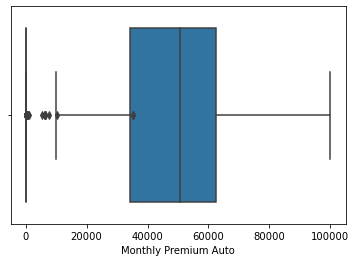

In [77]:
sns.boxplot(x=cars1['Income'])


<AxesSubplot:xlabel='Monthly Premium Auto'>

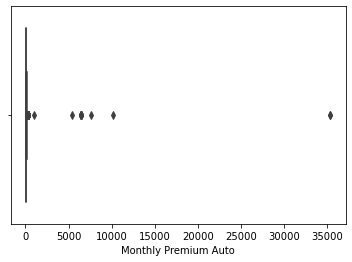

In [78]:
sns.boxplot(x=cars1['Monthly Premium Auto'])

In [67]:
q1_income = cars1['Income'].quantile(.25)

q3_income = cars1['Income'].quantile(.75)


In [69]:
iqr_income=q3_income-q1_income

In [70]:

range_low  = q1_income-1.5*iqr_income
range_high = q3_income+1.5*iqr_income
df_filtered = cars1[(cars1['Income'] <= range_high) & (cars1['Income'] >= range_low)]
    

In [73]:
q1_income

34337.0

In [71]:
df_filtered

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
1,QZ44356,Central,Female,Bachelor,6980.0,50516.58,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Central,Female,Bachelor,12887.0,48767.00,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,West Region,Male,Bachelor,7646.0,50516.58,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,East,Male,High School or Below,5363.0,36357.00,68.0,0,Personal Auto,Four-Door Car,17.269323
5,OC83172,North West,Female,Bachelor,8256.0,62902.00,69.0,0,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,West Region,Male,Bachelor,23406.0,71941.00,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,West Region,Female,College,3097.0,21604.00,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,West Region,Male,Bachelor,8164.0,50516.58,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,West Region,Male,College,7524.0,21941.00,96.0,0,Personal Auto,Four-Door Car,691.200000


In [61]:
q1_Lifetime_Value = cars1['Customer Lifetime Value'].quantile(.25)

q3_Lifetime_Value = cars1['Customer Lifetime Value'].quantile(.75)


In [63]:
iqr_Lifetime_Value=q3_Lifetime_Value-q1_Lifetime_Value

In [64]:
range_low  = q1_Lifetime_Value-1.5*q1_Lifetime_Value
range_high = q1_Lifetime_Value+1.5*q3_Lifetime_Value
df_filtered = cars1[(cars1['Customer Lifetime Value'] < range_high) & (cars1['Customer Lifetime Value'] > range_low)]

In [65]:
range_low ,range_high



(-1990.25, 17377.0)

In [148]:
df_filtered

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,SA25987,East,Male,High School or Below,3479.0,50516.58,104.0,0,Personal Auto,Two-Door Car,499.200000
1,TB86706,Central,Male,Master,2503.0,50516.58,66.0,0,Personal Auto,Two-Door Car,3.468912
2,ZL73902,Central,Female,Bachelor,3265.0,25820.00,82.0,0,Personal Auto,Four-Door Car,393.600000
3,KX23516,West Region,Female,High School or Below,4456.0,50516.58,121.0,0,Personal Auto,SUV,699.615192
4,FN77294,West Region,Male,High School or Below,7705.0,30366.00,101.0,2,Personal Auto,SUV,484.800000
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,West Region,Male,Bachelor,23406.0,71941.00,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,West Region,Female,College,3097.0,21604.00,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,West Region,Male,Bachelor,8164.0,50516.58,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,West Region,Male,College,7524.0,21941.00,96.0,0,Personal Auto,Four-Door Car,691.200000


In [138]:
cars1

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
1,QZ44356,Central,Female,Bachelor,697954.0,50516.58,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Central,Female,Bachelor,1288743.0,48767.00,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,West Region,Male,Bachelor,764586.0,50516.58,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,East,Male,High School or Below,536308.0,36357.00,68.0,0,Personal Auto,Four-Door Car,17.269323
5,OC83172,North West,Female,Bachelor,825630.0,62902.00,69.0,0,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,West Region,Male,Bachelor,23406.0,71941.00,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,West Region,Female,College,3097.0,21604.00,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,West Region,Male,Bachelor,8164.0,50516.58,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,West Region,Male,College,7524.0,21941.00,96.0,0,Personal Auto,Four-Door Car,691.200000


*Lowering case

In [392]:
cars1['Policy Type'].str.lower()

0        personal auto
1        personal auto
2       corporate auto
3        personal auto
4        personal auto
             ...      
9122     personal auto
9123    corporate auto
9124    corporate auto
9125     personal auto
9126    corporate auto
Name: Policy Type, Length: 8659, dtype: object

In [393]:
cars1

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,QZ44356,Central,Female,Bachelor,6980.0,50516.58,94.0,0,Personal Auto,Four-Door Car,1131.464935
1,AI49188,Central,Female,Bachelor,12887.0,48767.00,108.0,0,Personal Auto,Two-Door Car,566.472247
2,WW63253,West Region,Male,Bachelor,7646.0,50516.58,106.0,0,Corporate Auto,SUV,529.881344
3,GA49547,East,Male,High School or Below,5363.0,36357.00,68.0,0,Personal Auto,Four-Door Car,17.269323
4,OC83172,North West,Female,Bachelor,8256.0,62902.00,69.0,0,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
9122,LA72316,West Region,Male,Bachelor,23406.0,71941.00,73.0,0,Personal Auto,Four-Door Car,198.234764
9123,PK87824,West Region,Female,College,3097.0,21604.00,79.0,0,Corporate Auto,Four-Door Car,379.200000
9124,TD14365,West Region,Male,Bachelor,8164.0,50516.58,85.0,3,Corporate Auto,Four-Door Car,790.784983
9125,UP19263,West Region,Male,College,7524.0,21941.00,96.0,0,Personal Auto,Four-Door Car,691.200000


In [ ]:
q1_Premium = cars['Monthly Premium Auto'].quantile(.25)

q3_Premium = cars['Monthly Premium Auto'].quantile(.75)


In [ ]:
q1_Premium

In [ ]:
q3_Premium

In [ ]:
q1_life_time_value

In [ ]:
q3_life_time_value

NameError: name 'Income' is not defined